In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder


In [2]:
original_data_file = "HackathonData2024.csv"

In [3]:
df = pd.read_csv(original_data_file)
print(df.head())

   Well ID  Avg Pump Difference      Area  Lateral Length Fluid System  \
0        1                -0.93    Acadia           10300     Campbell   
1        2                -8.45    Acadia           10300     Campbell   
2        3                 8.70    Arches           11000     Campbell   
3        4                  NaN    Arches           11000     Campbell   
4        5                19.93  Badlands            2300     Campbell   

       TVD Development Strategy  DELAYED  BOUND_CODE CODEV_POSITION  ...  \
0  10415.0                 Coke        1    11100000           Edge  ...   
1  10415.0                 Coke        1    11100000           Edge  ...   
2   8470.0         Orange Crush        0      101111         Middle  ...   
3  10555.0                 Coke        1    11110000           Edge  ...   
4   9295.0         Mountain Dew        1    10001101           Edge  ...   

  CODEV_3000_AVG_TVD_DIST  CODEV_3000_AVG_WELL_AGE  \
0                       4                   

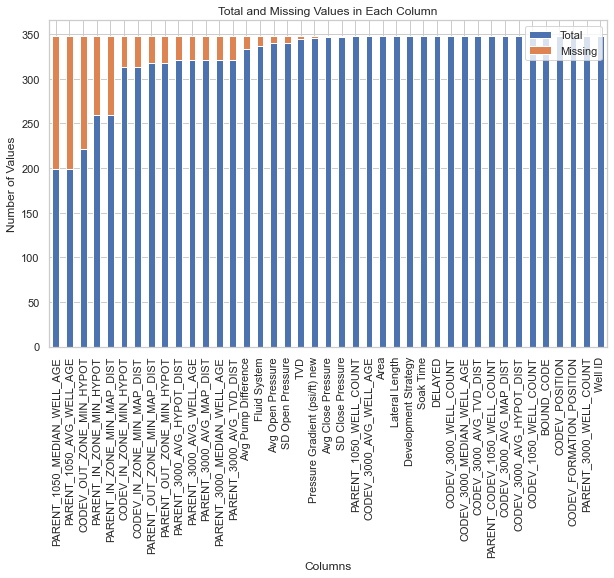

In [4]:
total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

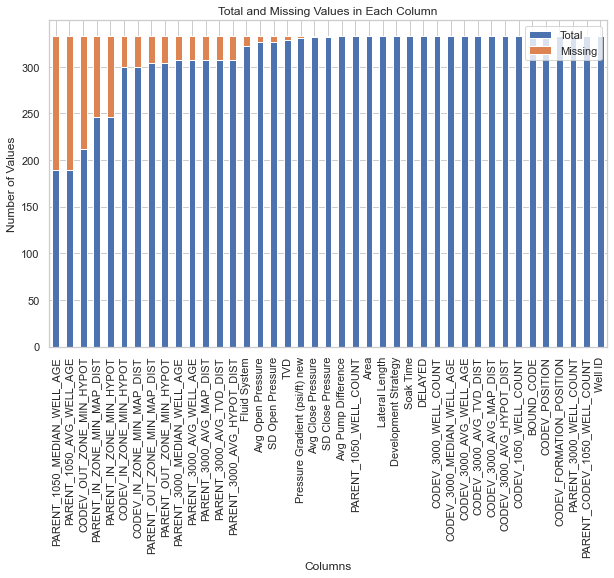

In [5]:
df = df.dropna(subset=['Avg Pump Difference'])


total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

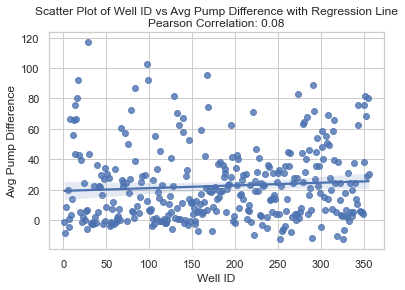

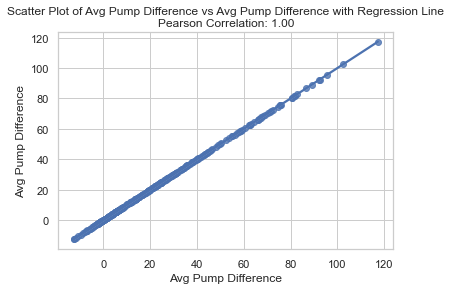

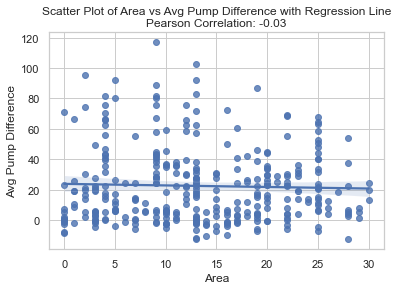

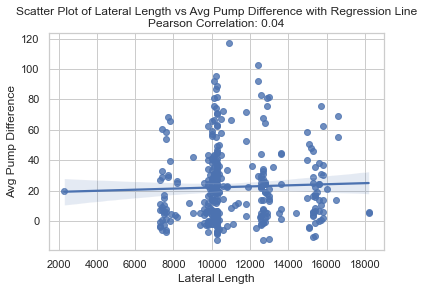

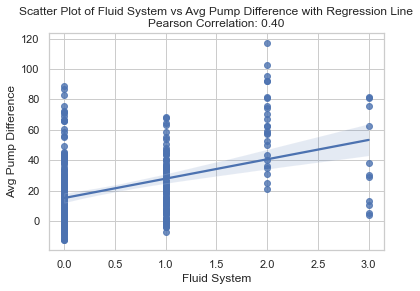

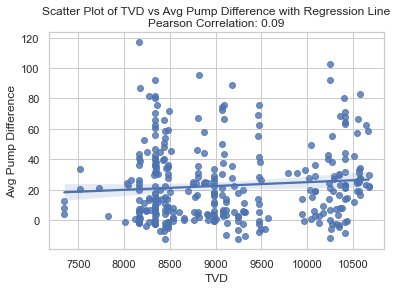

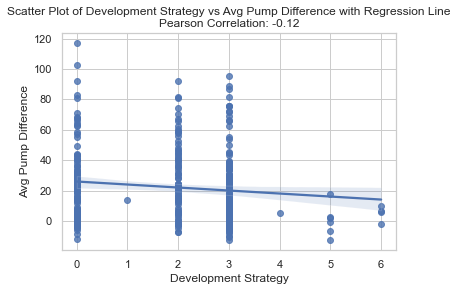

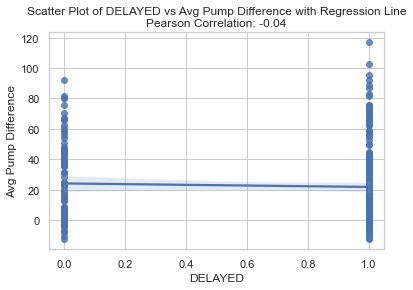

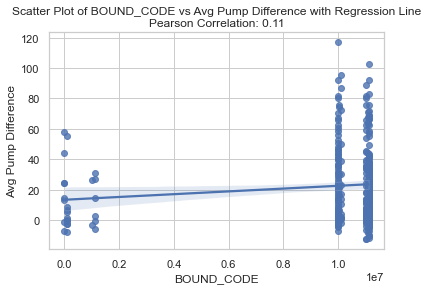

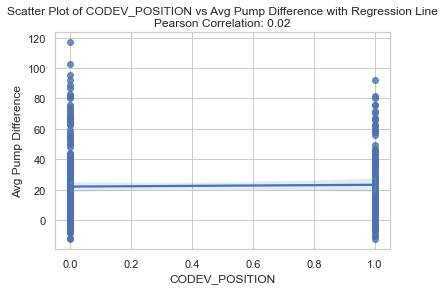

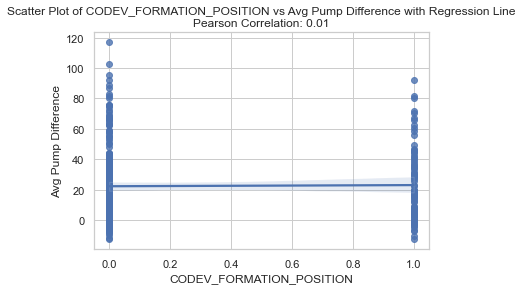

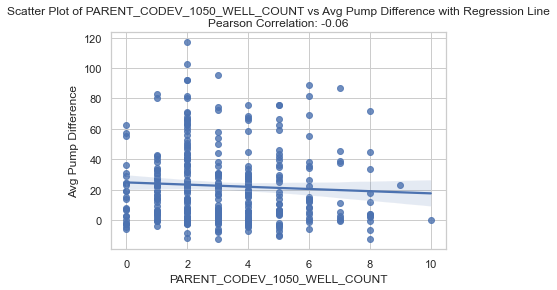

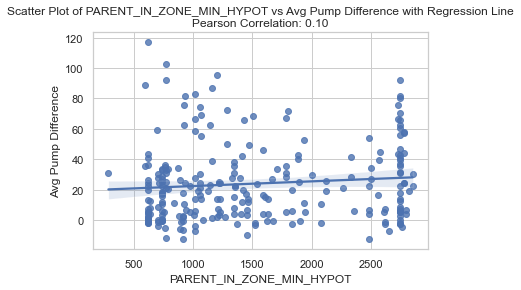

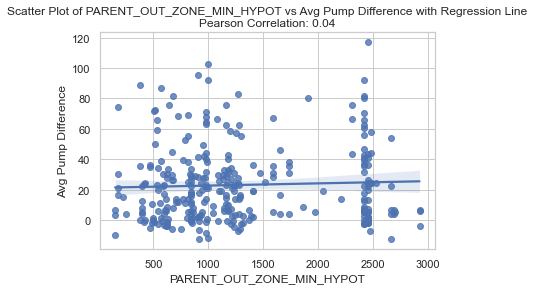

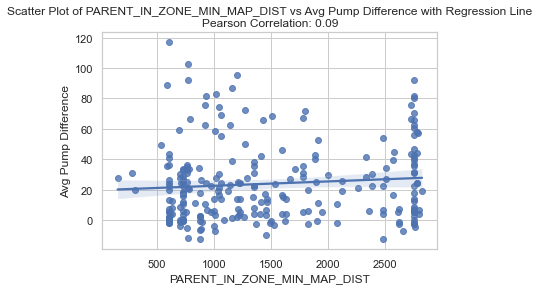

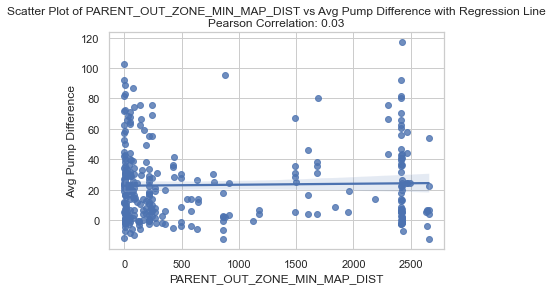

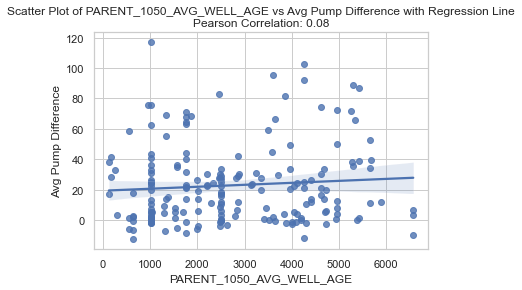

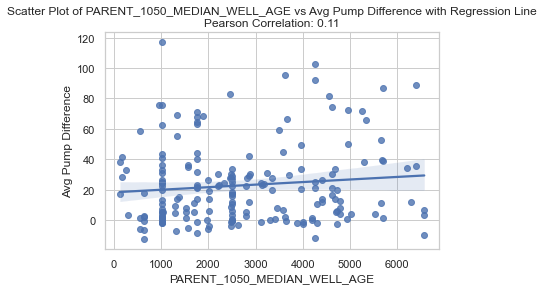

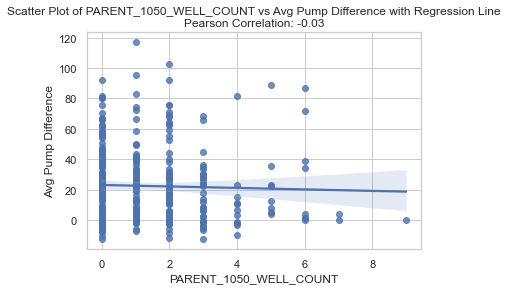

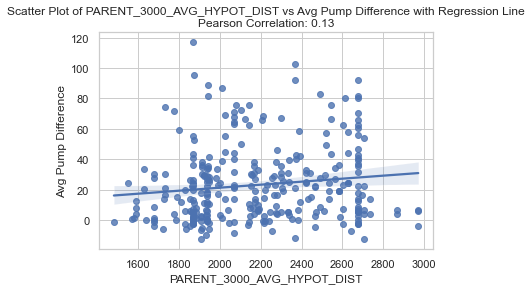

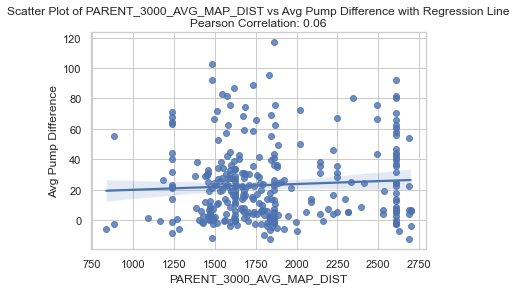

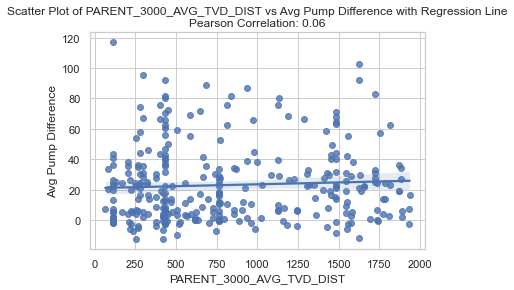

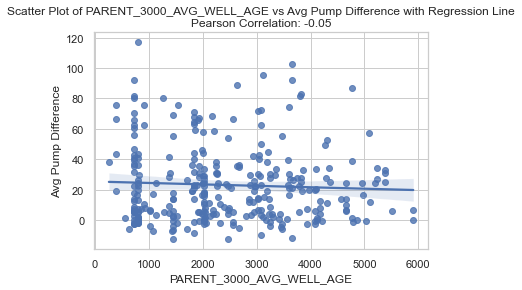

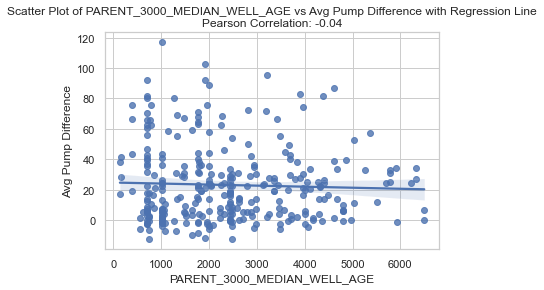

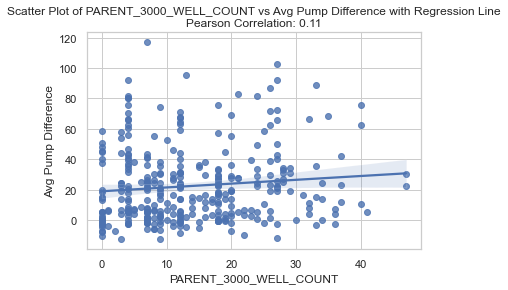

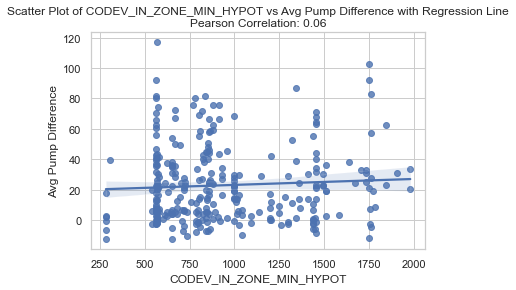

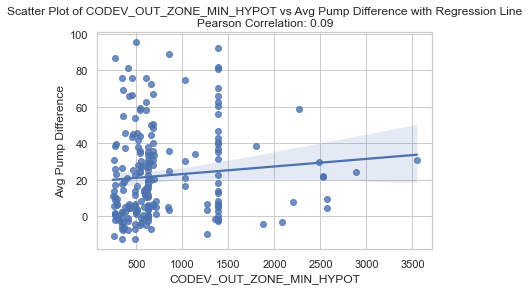

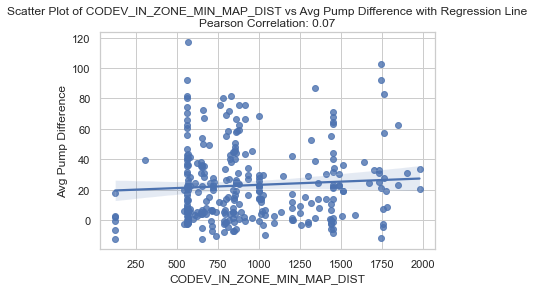

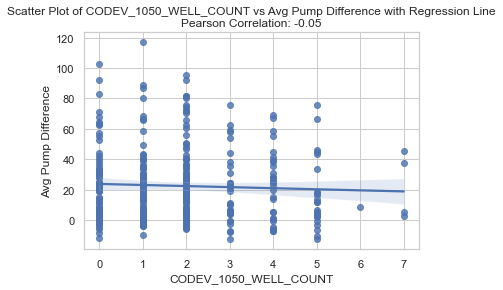

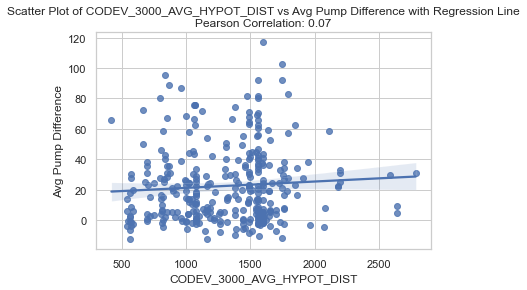

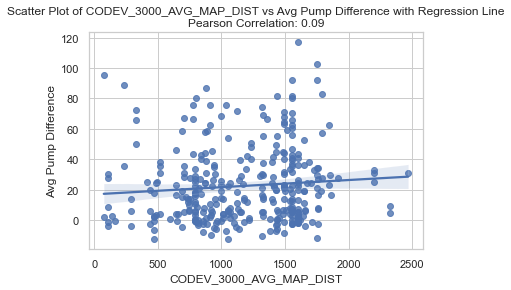

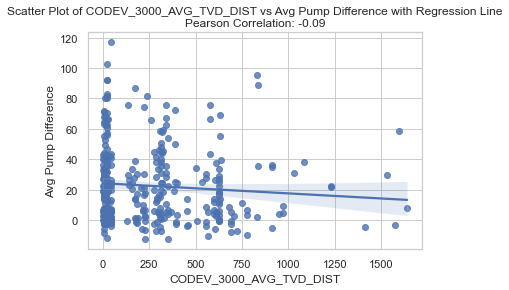

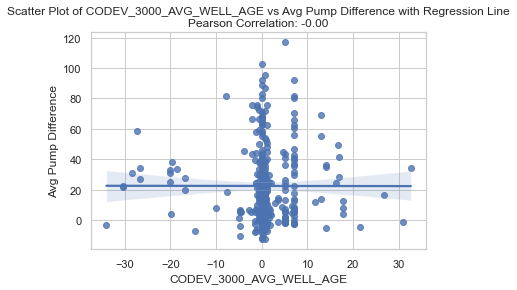

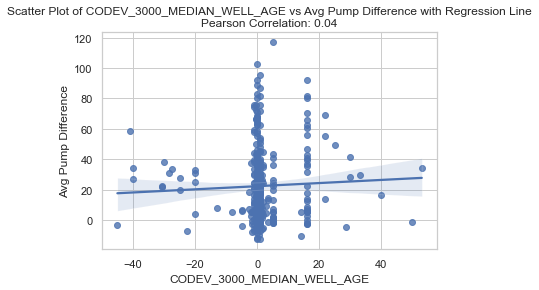

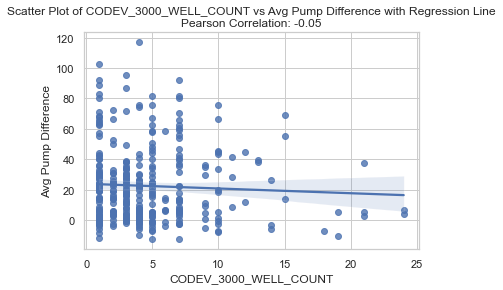

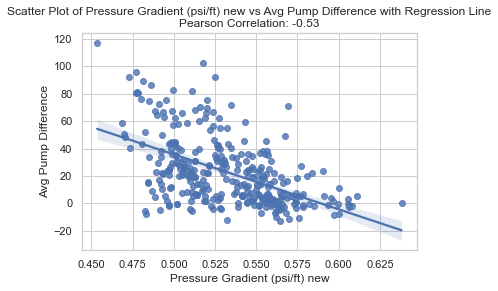

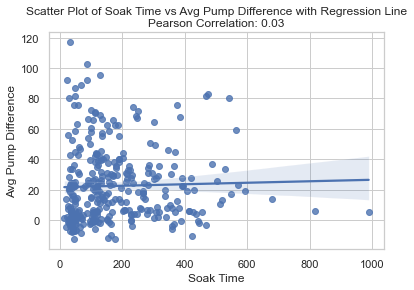

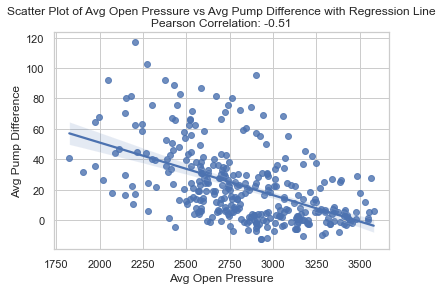

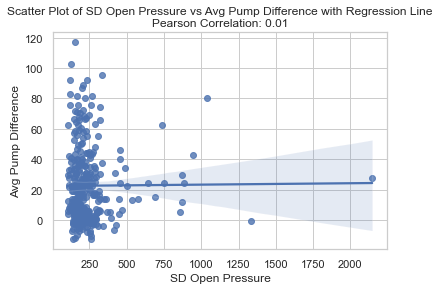

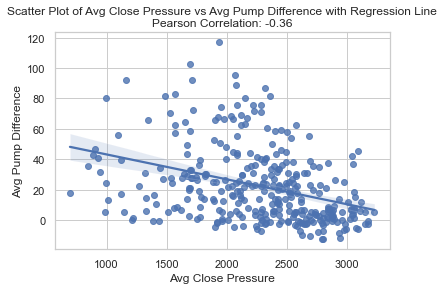

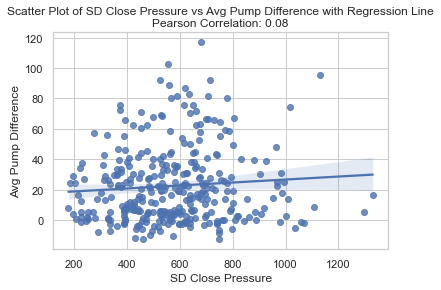

In [6]:
responseVariable = 'Avg Pump Difference'

def encode_if_categorical(column, df):
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        return encoder.fit_transform(df[column])
    return df[column]



for variable1 in df.columns:
    # Encode the variables if they are categorical
    encoded_var1 = encode_if_categorical(variable1, df)
    encoded_var2 = encode_if_categorical(responseVariable, df)

    # Create a new DataFrame for plotting and correlation
    plot_df = pd.DataFrame({variable1: encoded_var1, responseVariable: encoded_var2}).dropna()

    # Calculate the Pearson Correlation Coefficient
    correlation_coef, _ = pearsonr(plot_df[variable1], plot_df[responseVariable])

    # Plot with Regression Line
    sns.regplot(x=variable1, y=responseVariable, data=plot_df)
    plt.title(f'Scatter Plot of {variable1} vs {responseVariable} with Regression Line\n'
              f'Pearson Correlation: {correlation_coef:.2f}')
    plt.xlabel(variable1)
    plt.ylabel(responseVariable)
    plt.show()


# Feature Selection with Random Forest Recursive Feature Elimination 

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV

In [8]:
X = df.drop('Avg Pump Difference', axis=1)  # Features
y = df['Avg Pump Difference']  # Target variable
X = X.apply(lambda col: encode_if_categorical(col.name, X))



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regressor
regressor = RandomForestRegressor()

# Initialize RFECV (Recursive Feature Elimination with Cross-Validation)
rfecv = RFECV(estimator=regressor, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Find the optimal number of features
optimal_features = rfecv.n_features_

# Print the optimal number of features
print(f"Optimal number of features: {optimal_features}")

# Get the mask of selected features
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

# Evaluate model performance
y_pred = rfecv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').